In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_infos = []
for i in range(6): # 6 clusters
    path = '../Data/Cluster'+str(i)
    df = pd.read_csv(path, delimiter=',')
    df.rename(columns={"Unnamed: 0": "original_id"},inplace=True)
    df = df.drop('cardio', axis=1) # remove cardio target
    df.insert(len(df.columns), 'cluster', i)
    df_infos.append(df)
    
    
cluster_summaries = pd.concat(df_infos, axis=0)
cluster_summaries

,original_id,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cluster
0,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,0
1,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,0
2,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
3,22,32,23046,1,158,90.0,145,85,2,2,0,0,1,0
4,24,35,16608,1,170,68.0,150,90,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26658,69987,99979,18852,1,151,49.0,120,80,1,1,0,0,1,5
26659,69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,5
26660,69989,99985,21013,1,157,83.0,120,70,1,1,0,0,1,5
26661,69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,5


In [3]:
df_feat = cluster_summaries.iloc[:,2:-1] # eventhing but last column
target = cluster_summaries.iloc[:,-1] # last column (cluster ID)

df_feat.head() # age is in days

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,20228,1,156,85.0,140,90,3,1,0,0,1
1,17623,2,169,82.0,150,100,1,1,0,0,1
2,22113,1,157,93.0,130,80,3,1,0,0,1
3,23046,1,158,90.0,145,85,2,2,0,0,1
4,16608,1,170,68.0,150,90,3,1,0,0,1


In [4]:
from sklearn.preprocessing import StandardScaler
# standardize: mean = 0, std = 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_feat)
print(scaled_features)

[[ 0.30934896 -0.73122565 -1.07417839 ... -0.31062043 -0.2374748
   0.49477573]
 [-0.74603322  1.36756691  0.58251013 ... -0.31062043 -0.2374748
   0.49477573]
 [ 1.07303242 -0.73122565 -0.94674081 ... -0.31062043 -0.2374748
   0.49477573]
 ...
 [ 0.62738159 -0.73122565 -0.94674081 ... -0.31062043 -0.2374748
   0.49477573]
 [-1.77062498 -0.73122565  0.45507255 ... -0.31062043 -0.2374748
   0.49477573]
 [ 0.43575174 -0.73122565  0.70994771 ... -0.31062043 -0.2374748
   0.49477573]]


In [5]:
from sklearn.decomposition import PCA

# compress data via PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])

# citation: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [6]:
cluster_summaries = cluster_summaries.reset_index()
finalDf = pd.concat([principalDf, cluster_summaries[['cluster']]], axis = 1)

finalDf

,PC 1,PC 2,cluster
0,1.196049,-2.071616,0
1,1.944179,0.402934,0
2,0.784942,-1.779224,0
3,1.464697,-2.176240,0
4,1.216479,-1.100047,0
...,...,...,...
68499,-2.000128,-0.982096,5
68500,-1.996206,-0.345231,5
68501,-1.196083,-0.462035,5
68502,-1.870049,0.912053,5


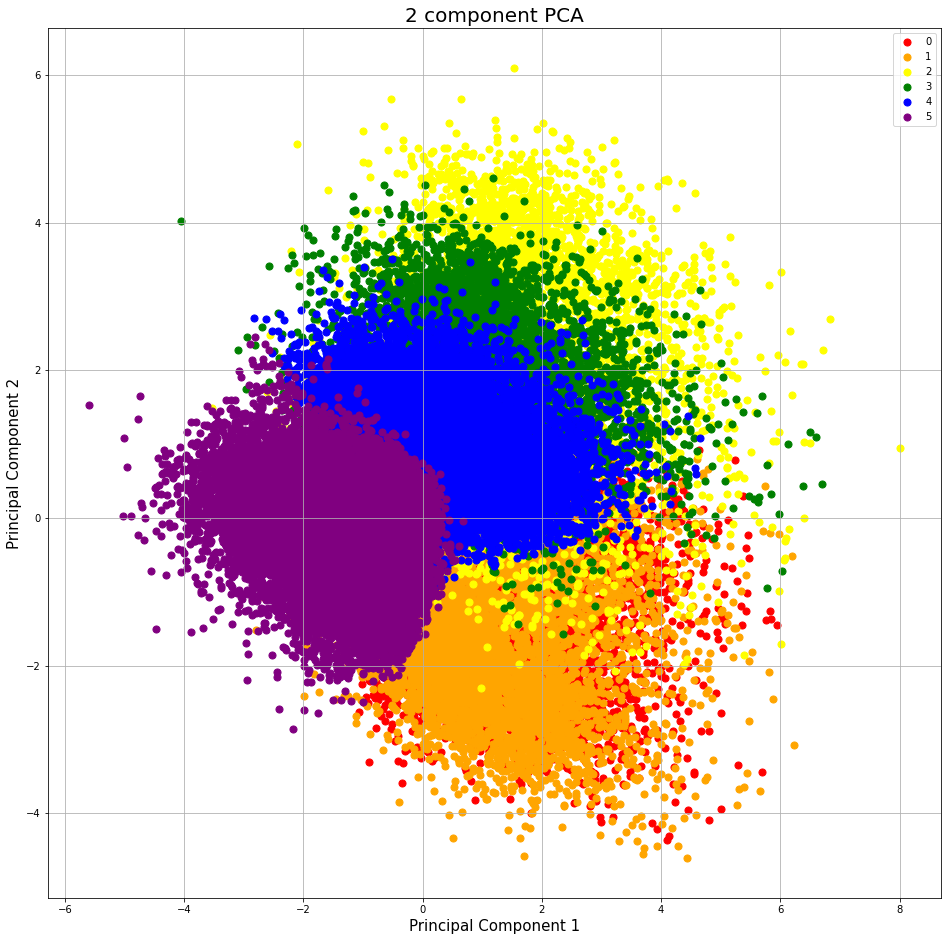

In [8]:
fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
# check how much data is explained

print('Data Represented for Principal Component 1: {}'.format(pca.explained_variance_ratio_[0]))
print('Data Represented for Principal Component 1: {}'.format(pca.explained_variance_ratio_[1]))
print('Total Data Represented: {}'.format(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]))

Data Represented for Principal Component 1: 0.2011136046239545
Data Represented for Principal Component 1: 0.1711312618432058
Total Data Represented: 0.37224486646716026


In [10]:
from sklearn.manifold import TSNE

# compress data via T-SNE
tSNECompressedData = TSNE(perplexity=30).fit_transform(df_feat)

tsneDf = pd.DataFrame(data = tSNECompressedData, columns = ['Component 1', 'Component 2'])

In [11]:
# cluster_summaries = cluster_summaries.reset_index()
finalTsneDf = pd.concat([tsneDf, cluster_summaries[['cluster']]], axis = 1)

finalTsneDf

,Component 1,Component 2,cluster
0,1.212855,-23.665703,0
1,-31.520870,46.263683,0
2,-10.987696,22.011507,0
3,-25.386147,-9.096892,0
4,-39.357216,-35.558464,0
...,...,...,...
68499,19.281130,10.418788,5
68500,-24.778566,-25.909077,5
68501,21.604219,-52.565292,5
68502,48.857021,-28.249239,5


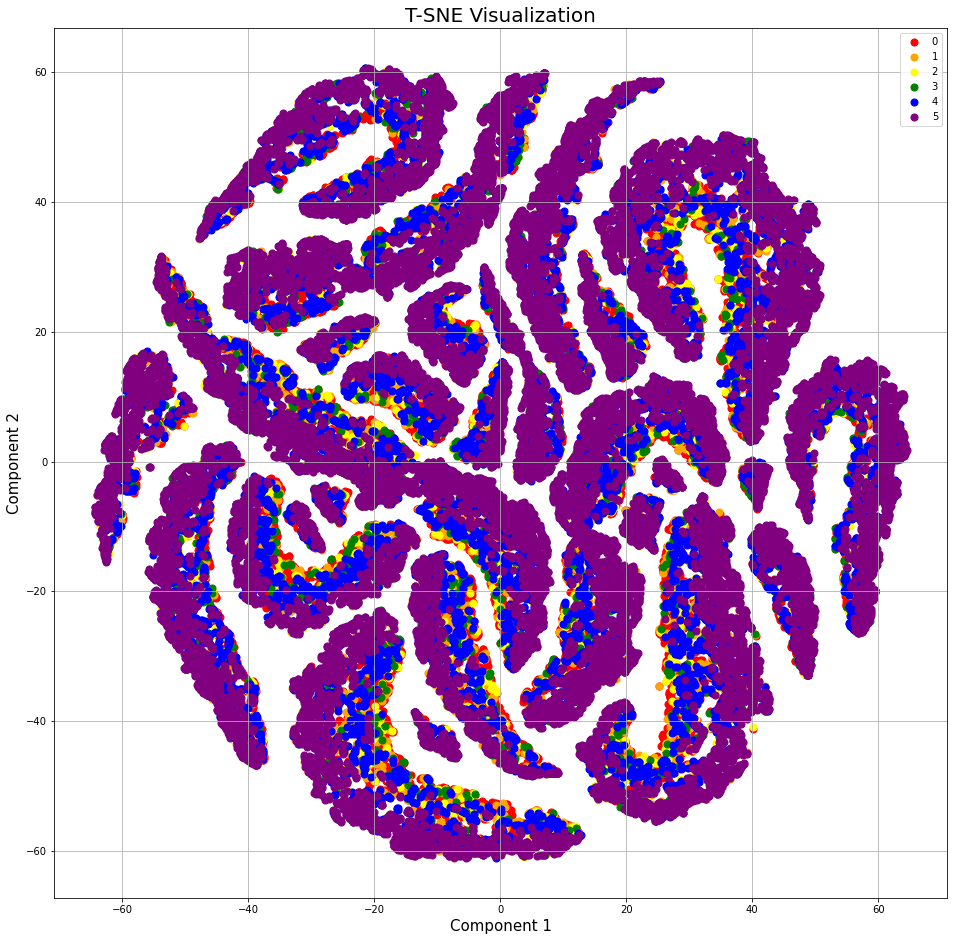

In [13]:
fig2 = plt.figure(figsize = (16, 16))
ax2 = fig2.add_subplot(1,1,1) 
ax2.set_xlabel('Component 1', fontsize = 15)
ax2.set_ylabel('Component 2', fontsize = 15)
ax2.set_title('T-SNE Visualization', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalTsneDf['cluster'] == target
    ax2.scatter(finalTsneDf.loc[indicesToKeep, 'Component 1']
               , finalTsneDf.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
ax2.legend(targets)
ax2.grid()

In [ ]:
# Research paper that discusses how T-SNE can fail to show clusters that may actually be present: 
# https://arxiv.org/abs/2110.02573